In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
# Specify the folder containing data
folder_path = "Data"

# Initialize containers for data and categories
dataframes = []
categories = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        category = file_name.replace("dataclean", "").replace(".csv", "").strip().lower()
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df['Category'] = category  # Assign category label based on file name
        dataframes.append(df)

# Combine all dataframes
data = pd.concat(dataframes, ignore_index=True)

# Combine Title and Content into a single feature
data['Text'] = data['Title'] + " " + data['Content']

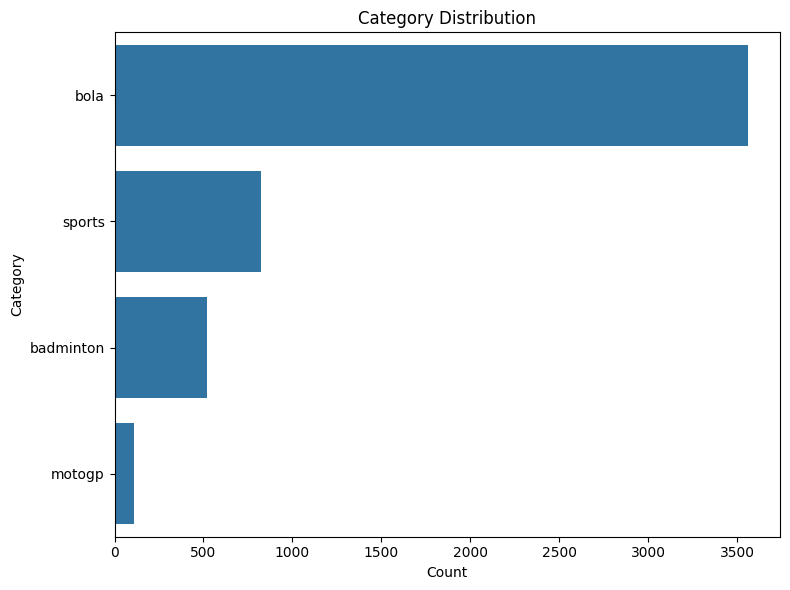

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Category', order=data['Category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('category_distribution.png')
plt.show()

In [4]:
# Encode categorical labels into numerical labels
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Category'], test_size=0.3, random_state=42)

In [6]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

   badminton       0.94      0.95      0.94       113
        bola       0.90      0.98      0.94       707
      motogp       0.78      0.91      0.84        23
      sports       0.82      0.48      0.61       162

    accuracy                           0.89      1005
   macro avg       0.86      0.83      0.83      1005
weighted avg       0.89      0.89      0.88      1005



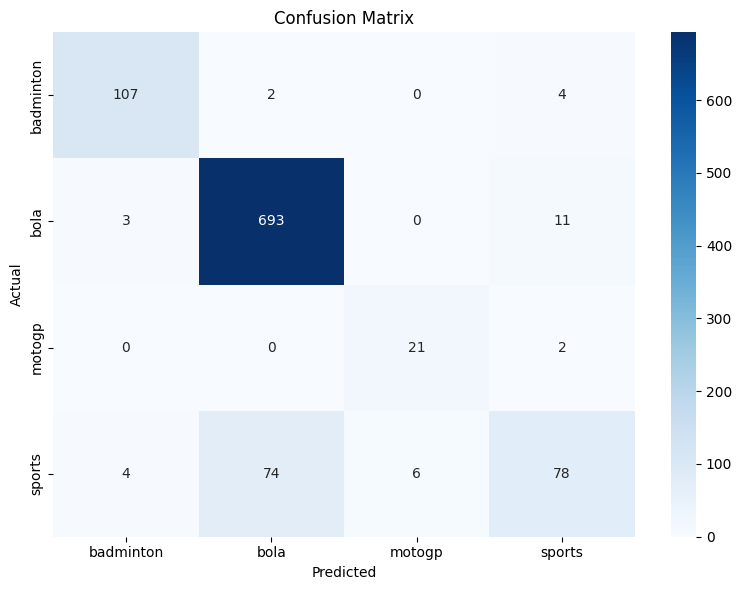

In [8]:
# Predict the test data
y_pred = model.predict(X_test_vec)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

In [9]:
# Save model and vectorizer for future use
joblib.dump(model, 'texts_classifier.pkl')
joblib.dump(vectorizer, 'vectorizers.pkl')

['vectorizers.pkl']

C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm', len(top_features))
C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette=colors)
c:\Users\arief\miniconda3\envs\tf\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arief\miniconda3\envs\

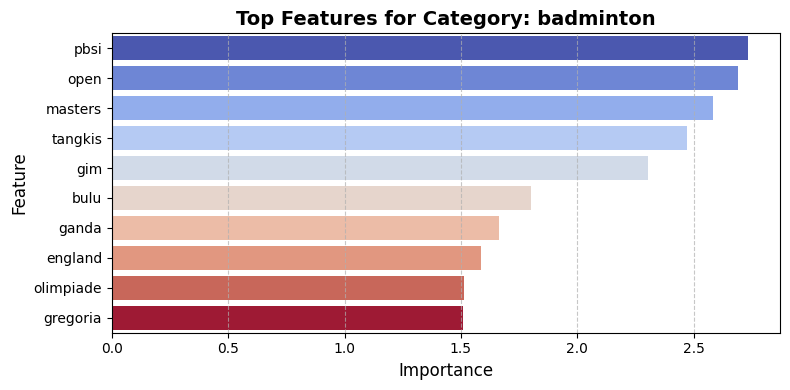

C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm', len(top_features))
C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette=colors)
c:\Users\arief\miniconda3\envs\tf\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arief\miniconda3\envs\

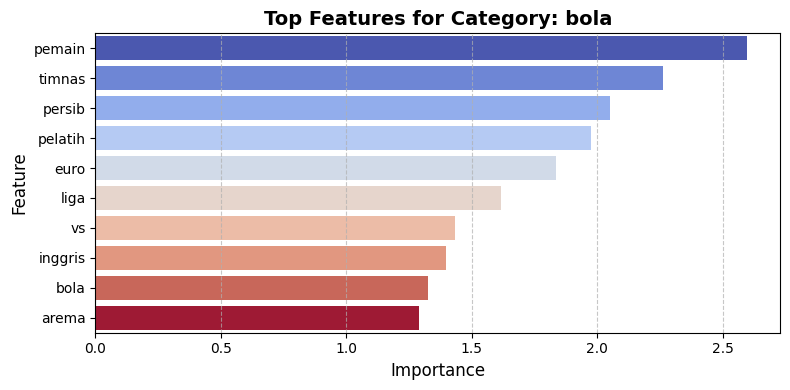

C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm', len(top_features))
C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette=colors)
c:\Users\arief\miniconda3\envs\tf\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arief\miniconda3\envs\

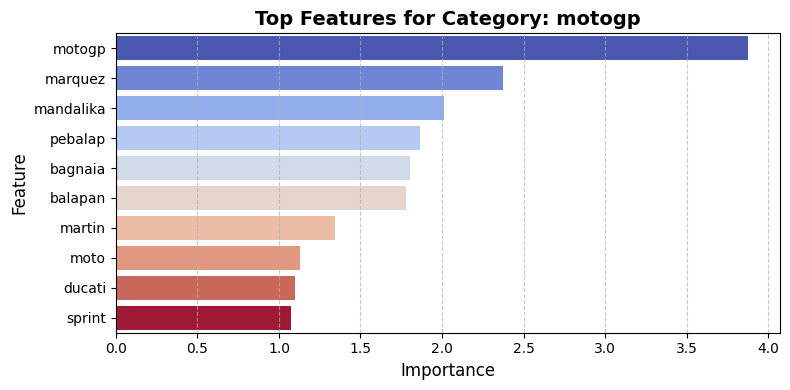

C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm', len(top_features))
C:\Users\arief\AppData\Local\Temp\ipykernel_18572\651462647.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette=colors)
c:\Users\arief\miniconda3\envs\tf\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\arief\miniconda3\envs\

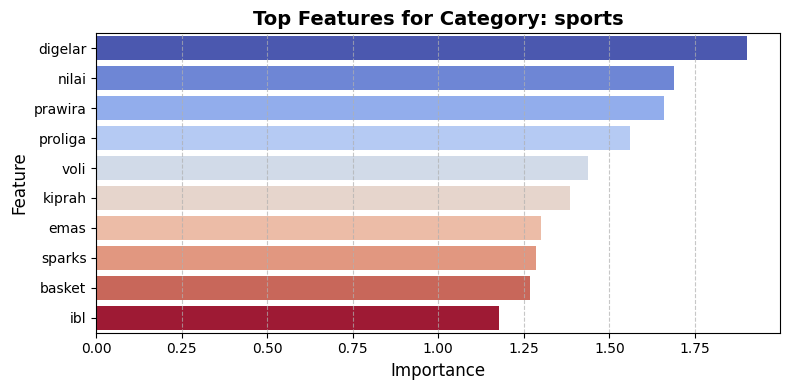

In [13]:
from matplotlib import cm

# Retrieve feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# Plot top features for each category
for i, category in enumerate(le.classes_):
    top_features_idx = coefficients[i].argsort()[-10:][::-1]
    top_features = [feature_names[j] for j in top_features_idx]
    top_scores = coefficients[i][top_features_idx]

    # Use a custom color map from matplotlib
    color_map = cm.get_cmap('coolwarm', len(top_features))
    colors = [color_map(i / len(top_features)) for i in range(len(top_features))]

    # Create the bar plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_scores, y=top_features, palette=colors)
    plt.title(f'Top Features for Category: {category}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'top_features_{category}.png')
    plt.show()